# Employment, Unemployment, and GDP Data Analysis

This notebook explores the dataset containing information about employment sectors (Agriculture, Industry, Services), unemployment rates, and GDP for different countries over multiple years.

## Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# Display settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the dataset
file_path = 'Employment_Unemployment_GDP_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


## Data Overview and Basic Statistics

In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check data types and missing values
print("\nData types and non-null counts:")
df.info()

Dataset shape: (5751, 7)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    5751 non-null   object 
 1   Year                            5751 non-null   int64  
 2   Employment Sector: Agriculture  5751 non-null   float64
 3   Employment Sector: Industry     5751 non-null   float64
 4   Employment Sector: Services     5751 non-null   float64
 5   Unemployment Rate               5751 non-null   float64
 6   GDP (in USD)                    5751 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 314.6+ KB


In [4]:
# Summary statistics
df.describe()

,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
count,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5.751000e+03
mean,2006.568945,28.857051,19.773784,51.369166,8.155004,3.099333e+11
std,9.175548,24.026669,8.606954,18.892155,6.147428,1.375556e+12
min,1991.000000,0.107774,2.060372,5.314014,0.100000,7.228540e+07
25%,1999.000000,7.173214,13.889285,36.846735,3.659000,5.098458e+09
50%,2007.000000,22.172104,20.105516,52.657618,6.358000,1.972356e+10
75%,2014.000000,46.130703,25.345213,66.602313,10.996000,1.277237e+11
max,2022.000000,92.482036,59.579079,93.416932,38.800000,2.600689e+13


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [6]:
# Check unique countries and years
print(f"Number of unique countries: {df['Country Name'].nunique()}")
print(f"Years covered: {df['Year'].min()} to {df['Year'].max()}")

Number of unique countries: 183
Years covered: 1991 to 2022


## Employment Sector Analysis

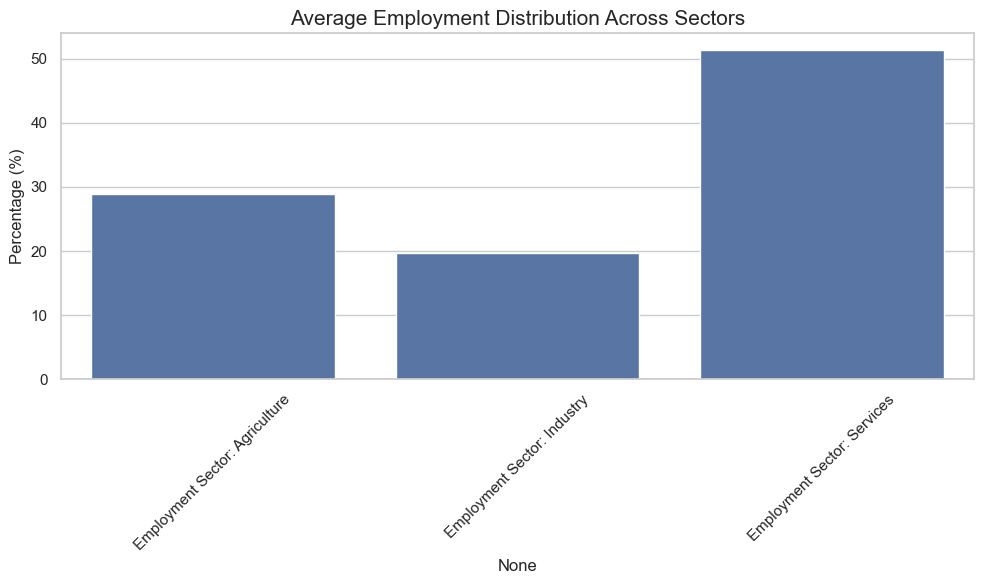

In [7]:
# Calculate average employment distribution across sectors
sector_cols = ['Employment Sector: Agriculture', 'Employment Sector: Industry', 'Employment Sector: Services']
sector_avg = df[sector_cols].mean()

# Plot average employment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_avg.index, y=sector_avg.values)
plt.title('Average Employment Distribution Across Sectors', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

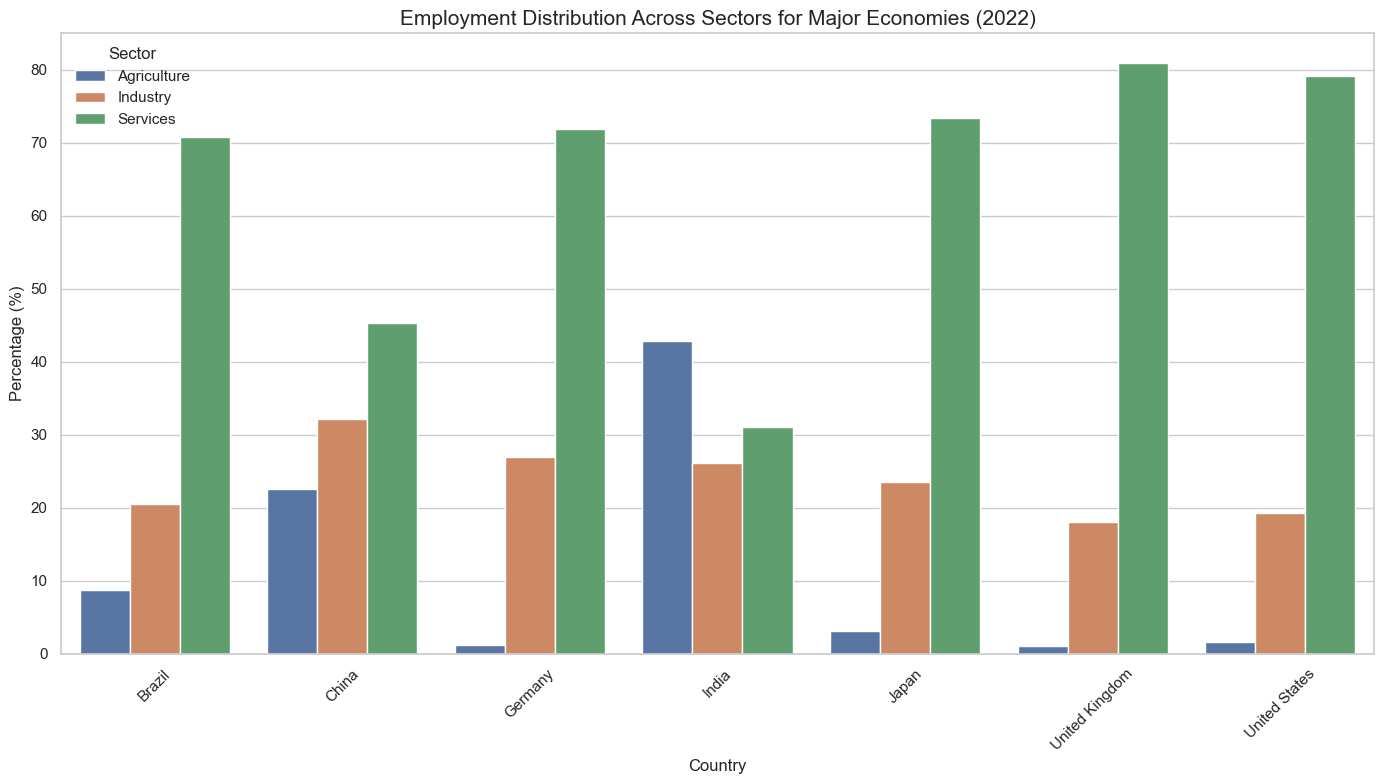

In [8]:
# Select a few major economies for comparison
major_countries = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'Brazil']
major_df = df[df['Country Name'].isin(major_countries)]

# Create a grouped bar chart for the latest available year
latest_year = major_df['Year'].max()
latest_data = major_df[major_df['Year'] == latest_year]

# Melt the dataframe for easier plotting
melted_df = pd.melt(latest_data, 
                    id_vars=['Country Name'], 
                    value_vars=sector_cols,
                    var_name='Sector', 
                    value_name='Percentage')

# Clean sector names for display
melted_df['Sector'] = melted_df['Sector'].str.replace('Employment Sector: ', '')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Country Name', y='Percentage', hue='Sector', data=melted_df)
plt.title(f'Employment Distribution Across Sectors for Major Economies ({latest_year})', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.tight_layout()
plt.show()

## Unemployment Rate Analysis

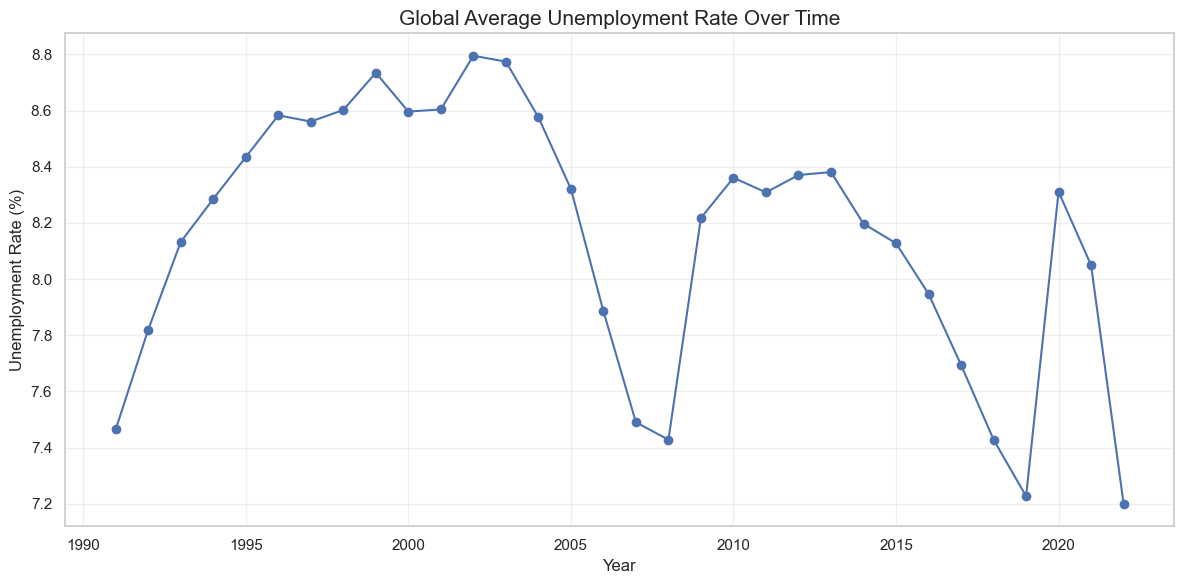

In [9]:
# Global average unemployment rate over time
unemployment_by_year = df.groupby('Year')['Unemployment Rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(unemployment_by_year['Year'], unemployment_by_year['Unemployment Rate'], marker='o', linestyle='-')
plt.title('Global Average Unemployment Rate Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/5n/4vdyj3zs5p7g80sdrphh3kvw0000gn/T/ipykernel_32696/3541232878.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unemployment Rate', y='Country Name', data=highest_unemployment, ax=axes[0], palette='Reds_r')
/var/folders/5n/4vdyj3zs5p7g80sdrphh3kvw0000gn/T/ipykernel_32696/3541232878.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unemployment Rate', y='Country Name', data=lowest_unemployment, ax=axes[1], palette='Greens_r')


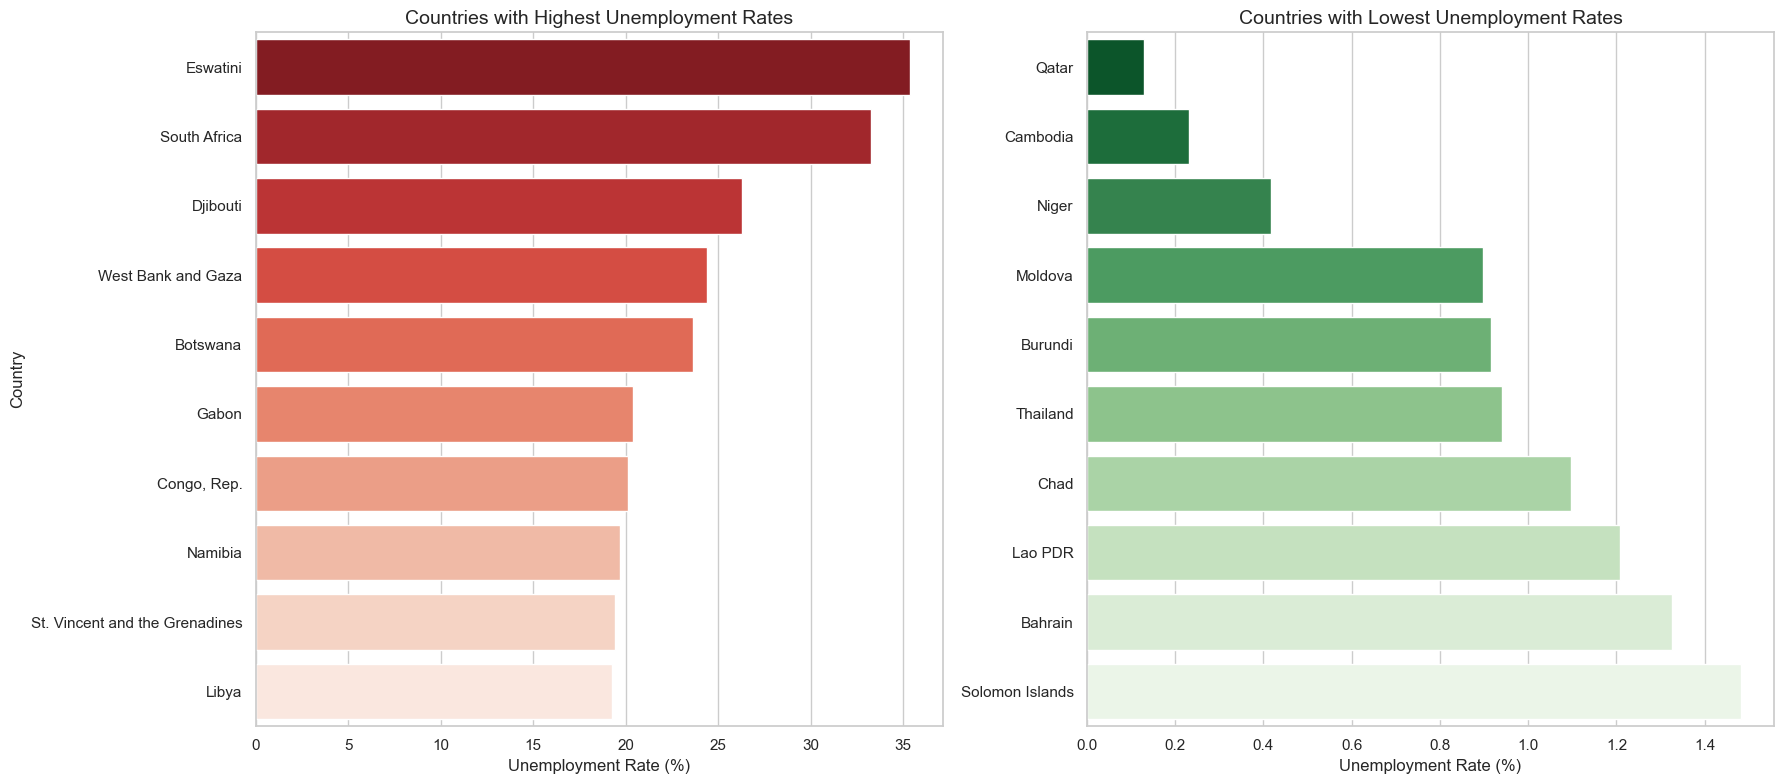

In [10]:
# Top 10 countries with highest and lowest unemployment rates (latest year)
latest_year_all = df['Year'].max()
latest_data_all = df[df['Year'] == latest_year_all]

# Highest unemployment
highest_unemployment = latest_data_all.nlargest(10, 'Unemployment Rate')[['Country Name', 'Unemployment Rate']]

# Lowest unemployment
lowest_unemployment = latest_data_all.nsmallest(10, 'Unemployment Rate')[['Country Name', 'Unemployment Rate']]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Highest unemployment
sns.barplot(x='Unemployment Rate', y='Country Name', data=highest_unemployment, ax=axes[0], palette='Reds_r')
axes[0].set_title('Countries with Highest Unemployment Rates', fontsize=14)
axes[0].set_xlabel('Unemployment Rate (%)', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)

# Lowest unemployment
sns.barplot(x='Unemployment Rate', y='Country Name', data=lowest_unemployment, ax=axes[1], palette='Greens_r')
axes[1].set_title('Countries with Lowest Unemployment Rates', fontsize=14)
axes[1].set_xlabel('Unemployment Rate (%)', fontsize=12)
axes[1].set_ylabel('', fontsize=12)

plt.tight_layout()
plt.show()

## GDP Analysis

/var/folders/5n/4vdyj3zs5p7g80sdrphh3kvw0000gn/T/ipykernel_32696/3503277781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP (in USD)', y='Country Name', data=top_gdp, palette='viridis')


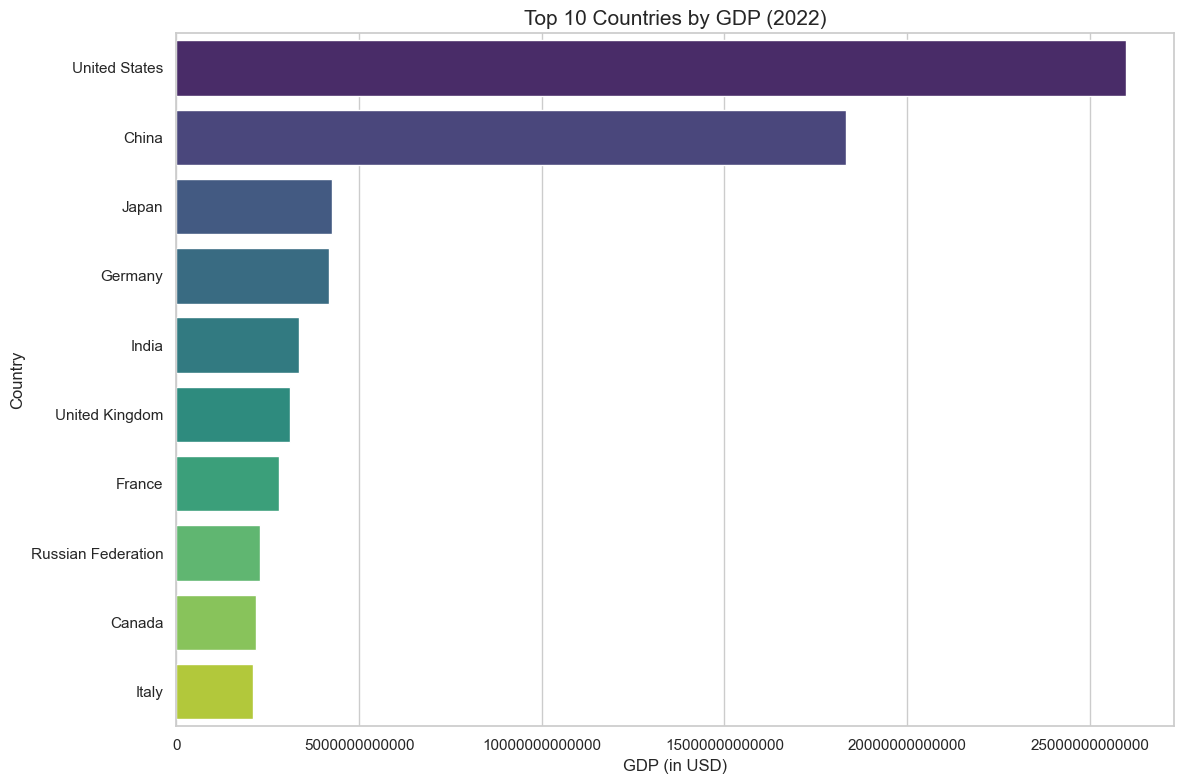

In [11]:
# Top 10 countries by GDP (latest year)
top_gdp = latest_data_all.nlargest(10, 'GDP (in USD)')[['Country Name', 'GDP (in USD)']]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='GDP (in USD)', y='Country Name', data=top_gdp, palette='viridis')
plt.title(f'Top 10 Countries by GDP ({latest_year_all})', fontsize=15)
plt.xlabel('GDP (in USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

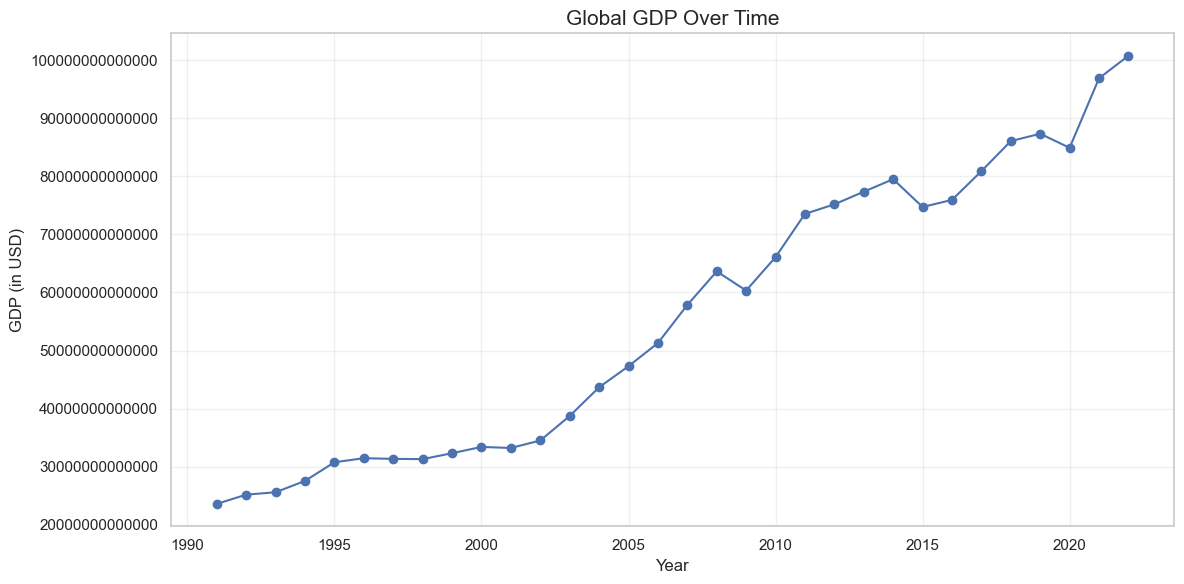

In [12]:
# Global GDP growth over time
gdp_by_year = df.groupby('Year')['GDP (in USD)'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(gdp_by_year['Year'], gdp_by_year['GDP (in USD)'], marker='o', linestyle='-')
plt.title('Global GDP Over Time', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Relationship Between Variables

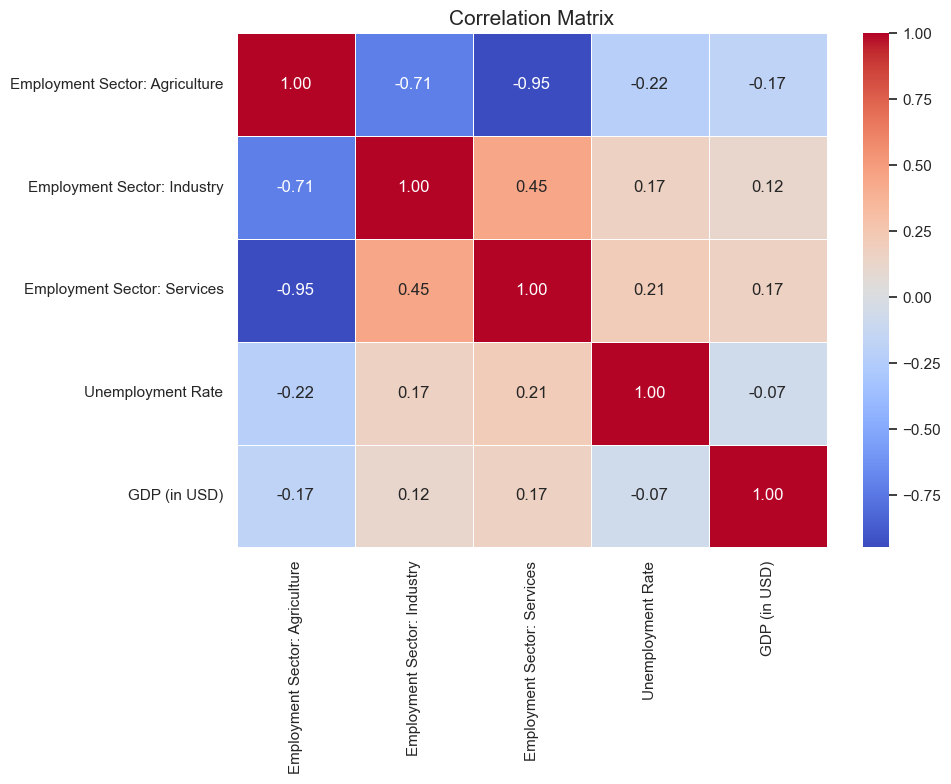

In [13]:
# Correlation matrix
correlation_cols = ['Employment Sector: Agriculture', 'Employment Sector: Industry', 
                    'Employment Sector: Services', 'Unemployment Rate', 'GDP (in USD)']
correlation_matrix = df[correlation_cols].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=15)
plt.tight_layout()
plt.show()

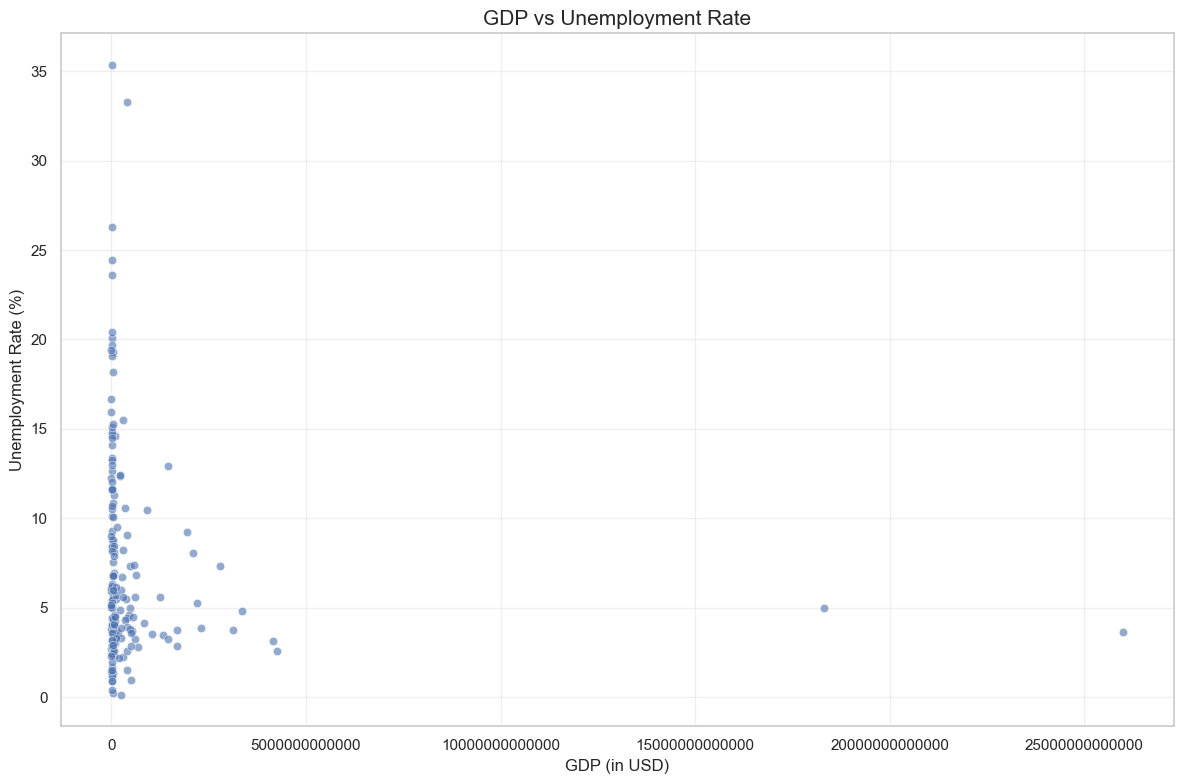

In [14]:
# Scatter plot: GDP vs Unemployment Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GDP (in USD)', y='Unemployment Rate', data=latest_data_all, alpha=0.6)
plt.title('GDP vs Unemployment Rate', fontsize=15)
plt.xlabel('GDP (in USD)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

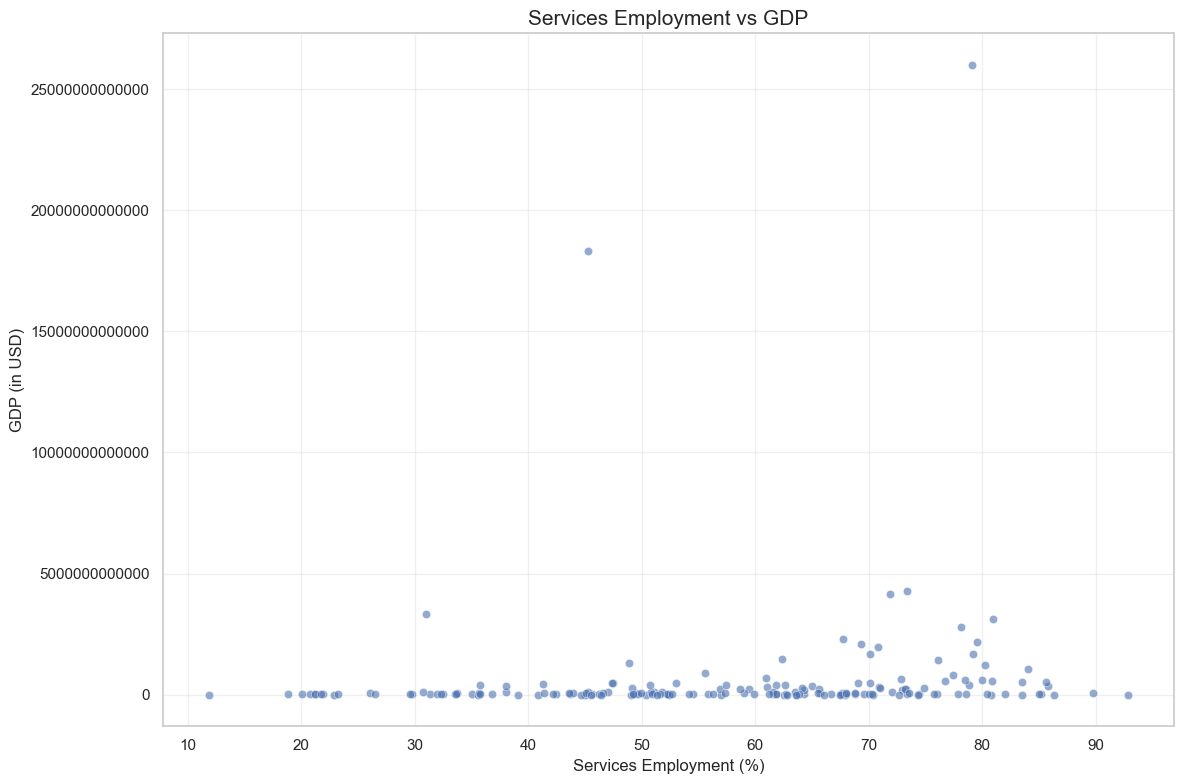

In [15]:
# Scatter plot: Services Employment vs GDP
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Employment Sector: Services', y='GDP (in USD)', data=latest_data_all, alpha=0.6)
plt.title('Services Employment vs GDP', fontsize=15)
plt.xlabel('Services Employment (%)', fontsize=12)
plt.ylabel('GDP (in USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Interactive Visualizations with Plotly

In [16]:
# Interactive scatter plot: GDP vs Unemployment with country labels
fig = px.scatter(latest_data_all, 
                x='GDP (in USD)', 
                y='Unemployment Rate',
                hover_name='Country Name',
                size='GDP (in USD)',
                color='Employment Sector: Services',
                title='GDP vs Unemployment Rate (with Services Employment %)',
                labels={'GDP (in USD)': 'GDP (USD)', 
                        'Unemployment Rate': 'Unemployment Rate (%)',
                        'Employment Sector: Services': 'Services Employment (%)'},
                height=600)

fig.update_layout(template='plotly_white')
fig.show()

In [17]:
# Interactive bar chart: Employment sectors for selected countries
selected_countries = ['United States', 'China', 'Japan', 'Germany', 'India', 'Brazil', 'United Kingdom', 'France']
selected_data = latest_data_all[latest_data_all['Country Name'].isin(selected_countries)]

# Melt the dataframe
melted_selected = pd.melt(selected_data, 
                         id_vars=['Country Name'], 
                         value_vars=sector_cols,
                         var_name='Sector', 
                         value_name='Percentage')

# Clean sector names
melted_selected['Sector'] = melted_selected['Sector'].str.replace('Employment Sector: ', '')

# Create interactive bar chart
fig = px.bar(melted_selected, 
            x='Country Name', 
            y='Percentage', 
            color='Sector',
            title=f'Employment Distribution Across Sectors for Selected Countries ({latest_year_all})',
            labels={'Country Name': 'Country', 'Percentage': 'Employment (%)'},
            height=600)

fig.update_layout(template='plotly_white')
fig.show()

## Conclusion

This exploratory data analysis has provided insights into the employment sectors, unemployment rates, and GDP across different countries over time. Key findings include:

1. The distribution of employment across agriculture, industry, and services sectors varies significantly by country.
2. There appears to be a relationship between the percentage of employment in the services sector and GDP.
3. The correlation between unemployment rates and GDP is not straightforward and may require more detailed analysis.
4. Global trends show changes in employment distribution over time, with a general shift towards service-based economies.

Further analysis could include:
- Time series analysis to better understand trends
- Regional comparisons
- More sophisticated statistical modeling to explore relationships between variables
- Analysis by country development status or geographic region